In [145]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import numpy as np

In [146]:
# read in MTA Turnstile Data - (Feb 2020, Feb 2021, and Feb 2022)
#3 seperate months of data
mta_df = pd.read_csv('mta_feb_data.csv', parse_dates=[['DATE','TIME']], keep_date_col=True)

In [147]:
# mta data frame
# 2707215 rows, 12 columns 
mta_df.shape

(2707215, 12)

In [148]:
# mta columns listed
mta_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [149]:
# read in Operating Businesses Data
operating_businesses_df = pd.read_csv('Legally_Operating_Businesses.csv', low_memory=False)

In [150]:
# 273125 rows, 27 columns
operating_businesses_df.shape

(273125, 27)

In [151]:
# operating businesses columns listed
operating_businesses_df.columns

Index(['DCA License Number', 'License Type', 'License Expiration Date',
       'License Status', 'License Creation Date', 'Industry', 'Business Name',
       'Business Name 2', 'Address Building', 'Address Street Name',
       'Secondary Address Street Name', 'Address City', 'Address State',
       'Address ZIP', 'Contact Phone Number', 'Address Borough',
       'Borough Code', 'Community Board', 'Council District', 'BIN', 'BBL',
       'NTA', 'Census Tract', 'Detail', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In [152]:
# read in COVID NYC Data
covid_df = pd.read_csv('COVID19_Daily_Counts_of_Cases_Hospitalizations_and_Deaths.csv', parse_dates=['DATE_OF_INTEREST'], keep_date_col=True)

In [153]:
# 739 rows, 62 columns 
covid_df.shape

(739, 62)

In [154]:
# covid dataframe columns listed
covid_df.columns

Index(['DATE_OF_INTEREST', 'CASE_COUNT', 'probable_case_count',
       'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'DEATH_COUNT_PROBABLE',
       'CASE_COUNT_7DAY_AVG', 'all_case_count_7day_avg', 'HOSP_COUNT_7DAY_AVG',
       'DEATH_COUNT_7DAY_AVG', 'all_death_count_7day_avg', 'BX_CASE_COUNT',
       'bx_probable_case_count', 'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT',
       'bx_probable_death_count', 'BX_CASE_COUNT_7DAY_AVG',
       'bx_all_case_count_7day_avg', 'BX_HOSPITALIZED_COUNT_7DAY_AVG',
       'BX_DEATH_COUNT_7DAY_AVG', 'bx_all_death_count_7day_avg',
       'BK_CASE_COUNT', 'bk_probable_case_count', 'BK_HOSPITALIZED_COUNT',
       'BK_DEATH_COUNT', 'bk_probable_death_count', 'BK_CASE_COUNT_7DAY_AVG',
       'bk_all_case_count_7day_avg', 'BK_HOSPITALIZED_COUNT_7DAY_AVG',
       'BK_DEATH_COUNT_7DAY_AVG', 'bk_all_death_count_7day_avg',
       'MN_CASE_COUNT', 'mn_probable_case_count', 'MN_HOSPITALIZED_COUNT',
       'MN_DEATH_COUNT', 'mn_probable_death_count', 'MN_CASE_COUNT_7DAY_AVG'

In [155]:
# inspect mta dataframe
mta_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2022-02-19 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,03:00:00,REGULAR,7688079,2668548
1,2022-02-19 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,07:00:00,REGULAR,7688081,2668566
2,2022-02-19 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,11:00:00,REGULAR,7688102,2668666
3,2022-02-19 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,15:00:00,REGULAR,7688138,2668749
4,2022-02-19 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,19:00:00,REGULAR,7688207,2668805


In [156]:
# inspect data types
mta_df.dtypes

DATE_TIME    datetime64[ns]
C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
dtype: object

# Cleaning Data

In [157]:
#description of data
mta_df['ENTRIES'].describe().apply('{0:.2f}'.format)

count       2707215.00
mean       42655501.33
std       220291421.75
min               0.00
25%          262144.00
50%         1624549.00
75%         6286560.00
max      2147329005.00
Name: ENTRIES, dtype: object

In [158]:
#2bn entries max value? Investigating extreme outliers.

In [159]:
#data mask for max value
max_value_mask = (mta_df["ENTRIES"] == 2147329005)

In [160]:
#max value review
mta_df[max_value_mask]

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
670838,2022-01-29,J003,R352,00-00-00,HEWES ST,JM,BMT,01/29/2022,00:00:00,REGULAR,2147329005,671202803


In [161]:
#sliced data section, station traffic for Hewes seems rather high.
mta_df[670834:670843]

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
670834,2022-02-04 08:00:00,J002,R460,00-06-00,MARCY AV,JMZ,BMT,02/04/2022,08:00:00,REGULAR,440126,556761
670835,2022-02-04 12:00:00,J002,R460,00-06-00,MARCY AV,JMZ,BMT,02/04/2022,12:00:00,REGULAR,440154,556885
670836,2022-02-04 16:00:00,J002,R460,00-06-00,MARCY AV,JMZ,BMT,02/04/2022,16:00:00,REGULAR,440222,556995
670837,2022-02-04 20:00:00,J002,R460,00-06-00,MARCY AV,JMZ,BMT,02/04/2022,20:00:00,REGULAR,440282,557161
670838,2022-01-29 00:00:00,J003,R352,00-00-00,HEWES ST,JM,BMT,01/29/2022,00:00:00,REGULAR,2147329005,671202803
670839,2022-01-29 04:00:00,J003,R352,00-00-00,HEWES ST,JM,BMT,01/29/2022,04:00:00,REGULAR,2147328993,671202823
670840,2022-01-29 08:00:00,J003,R352,00-00-00,HEWES ST,JM,BMT,01/29/2022,08:00:00,REGULAR,2147328986,671202834
670841,2022-01-29 12:00:00,J003,R352,00-00-00,HEWES ST,JM,BMT,01/29/2022,12:00:00,REGULAR,2147328962,671202848
670842,2022-01-29 16:00:00,J003,R352,00-00-00,HEWES ST,JM,BMT,01/29/2022,16:00:00,REGULAR,2147328939,671202862


In [162]:
#parsing out year and month from date_time field and adding as columns to dataframe
mta_df['YEAR'] = mta_df["DATE_TIME"].dt.year
mta_df['MONTH'] = mta_df["DATE_TIME"].dt.month

In [163]:
#updated mta dataframe with new columns
mta_df

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,YEAR,MONTH
0,2022-02-19 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,03:00:00,REGULAR,7688079,2668548,2022,2
1,2022-02-19 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,07:00:00,REGULAR,7688081,2668566,2022,2
2,2022-02-19 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,11:00:00,REGULAR,7688102,2668666,2022,2
3,2022-02-19 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,15:00:00,REGULAR,7688138,2668749,2022,2
4,2022-02-19 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,19:00:00,REGULAR,7688207,2668805,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707210,2020-01-31 04:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2020,04:00:00,REGULAR,5554,420,2020,1
2707211,2020-01-31 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2020,08:00:00,REGULAR,5554,420,2020,1
2707212,2020-01-31 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2020,12:00:00,REGULAR,5554,420,2020,1
2707213,2020-01-31 16:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2020,16:00:00,REGULAR,5554,420,2020,1


In [164]:
#inspecting data
#filtering data frame with data mask for unique control area/unit/station combo
mask = ((mta_df["C/A"] == "A002") &
        (mta_df["UNIT"] == "R051") & 
        (mta_df["SCP"] == "02-00-00") & 
        (mta_df["STATION"] == "59 ST"))

mta_df[mask].head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,YEAR,MONTH
0,2022-02-19 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,03:00:00,REGULAR,7688079,2668548,2022,2
1,2022-02-19 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,07:00:00,REGULAR,7688081,2668566,2022,2
2,2022-02-19 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,11:00:00,REGULAR,7688102,2668666,2022,2
3,2022-02-19 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,15:00:00,REGULAR,7688138,2668749,2022,2
4,2022-02-19 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,19:00:00,REGULAR,7688207,2668805,2022,2


In [165]:
# citation - metis MTA excersies
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)
).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1817458,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-02 15:00:00,2
1817459,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-02 19:00:00,2
1817460,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-02 23:00:00,2
1817461,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-03 03:00:00,2
1817462,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-03 07:00:00,2


In [166]:
# citation - metis MTA excersies
# On 2/2/21, we seem to have two entries for same time.  Let's take a look -
mask_2 = ((mta_df["C/A"] == "R145") & 
(mta_df["UNIT"] == "R032") & 
(mta_df["SCP"] == "00-00-02") & 
(mta_df["STATION"] == "TIMES SQ-42 ST") &
(mta_df["DATE"] == '02/02/2021'))

mta_df[mask_2].head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,YEAR,MONTH
1608732,2021-02-02 03:00:00,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,03:00:00,REGULAR,6196233,2790793,2021,2
1608733,2021-02-02 03:00:00,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,03:00:00,RECOVR AUD,859721,974999,2021,2
1608734,2021-02-02 07:00:00,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,07:00:00,REGULAR,6196244,2790797,2021,2
1608735,2021-02-02 07:00:00,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,07:00:00,RECOVR AUD,859723,975017,2021,2
1608736,2021-02-02 11:00:00,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,11:00:00,REGULAR,6196266,2790822,2021,2


In [167]:
# sum of description column types
mta_df.DESC.value_counts()

REGULAR       2693190
RECOVR AUD      14025
Name: DESC, dtype: int64

In [168]:
# citation - metis MTA excersies
# Get rid of the duplicate entry
mta_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],inplace=True, ascending=False)
mta_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [169]:
# citation - metis MTA excersies
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES
 .count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)
).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-01-25 03:00:00,1
1804782,R141,R031,00-00-00,34 ST-PENN STA,2020-01-31 23:00:00,1
1804784,R141,R031,00-00-00,34 ST-PENN STA,2020-02-01 07:00:00,1
1804785,R141,R031,00-00-00,34 ST-PENN STA,2020-02-01 11:00:00,1
1804786,R141,R031,00-00-00,34 ST-PENN STA,2020-02-01 15:00:00,1


In [170]:
# Citation start - Jason Palumbo github - giasonep/eda_mta_turnstile_data
# sum the ENTRIES and EXITS columns together to create a total passage column
total = mta_df["ENTRIES"] + mta_df["EXITS"]

In [171]:
mta_df['PASS_SUM'] = total

In [172]:
mta_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,YEAR,MONTH,PASS_SUM
209848,2022-02-25 20:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/25/2022,20:00:00,REGULAR,0,23,2022,2,23
209847,2022-02-25 16:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/25/2022,16:00:00,REGULAR,0,23,2022,2,23
209846,2022-02-25 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/25/2022,12:00:00,REGULAR,0,23,2022,2,23
209845,2022-02-25 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/25/2022,08:00:00,REGULAR,0,23,2022,2,23
209844,2022-02-25 04:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/25/2022,04:00:00,REGULAR,0,23,2022,2,23


In [173]:
# create a dataframe to group all turnstiles by indetifies, lines, stations and date
diff_df = (mta_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "DATE_TIME"],as_index=False).PASS_SUM.first())

In [174]:
# create a daily passage column that sums period changes in entries and exits
diff_df["TOT_PASS"] = diff_df["PASS_SUM"].diff()

In [175]:
diff_df.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,PASS_SUM,TOT_PASS
0,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 03:00:00,9849798,NaN
1,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 07:00:00,9849819,21.0
2,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 11:00:00,9849931,112.0
3,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 15:00:00,9850145,214.0
4,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 19:00:00,9850443,298.0


In [176]:
# create a dataframe to group all turnstiles by indetifies, lines, stations and date
entries_change = (mta_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "DATE_TIME"],as_index=False)
                  .ENTRIES
                  .first()
                 )

In [177]:
# create a entries passage column that sums period changes for entries
entries_change["TOT_ENTRIES"] = entries_change["ENTRIES"].diff()

In [178]:
entries_change.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,ENTRIES,TOT_ENTRIES
0,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 03:00:00,7356095,NaN
1,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 07:00:00,7356105,10.0
2,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 11:00:00,7356170,65.0
3,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 15:00:00,7356333,163.0
4,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 19:00:00,7356581,248.0


In [179]:
# create a dataframe to group all turnstiles by unique indetifier
exits_change = (mta_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "DATE_TIME"],as_index=False)
                .EXITS
                .first()
               )

In [180]:
# create a entries passage column that sums period changes for entries
exits_change["TOT_EXITS"] = exits_change["EXITS"].diff()

In [181]:
exits_change.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,TOT_EXITS
0,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 03:00:00,2493703,NaN
1,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 07:00:00,2493714,11.0
2,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 11:00:00,2493761,47.0
3,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 15:00:00,2493812,51.0
4,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 19:00:00,2493862,50.0


In [182]:
diff_df.shape

(2707183, 8)

In [183]:
entries_change.shape

(2707183, 8)

In [184]:
exits_change.shape

(2707183, 8)

In [185]:
# add total entries column
diff_df['TOT_ENTRIES'] = entries_change['TOT_ENTRIES']

In [186]:
# add total exits column
diff_df['TOT_EXITS'] = exits_change['TOT_EXITS']

In [187]:
diff_df.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,PASS_SUM,TOT_PASS,TOT_ENTRIES,TOT_EXITS
0,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 03:00:00,9849798,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 07:00:00,9849819,21.0,10.0,11.0
2,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 11:00:00,9849931,112.0,65.0,47.0
3,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 15:00:00,9850145,214.0,163.0,51.0
4,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 19:00:00,9850443,298.0,248.0,50.0


In [188]:
diff_df['TOT_PASS'].describe().apply('{0:.2f}'.format)

count        2707182.00
mean              -3.64
std         82106717.93
min      -3960219950.00
25%               13.00
50%              105.00
75%              351.00
max       3958455817.00
Name: TOT_PASS, dtype: object

In [189]:
# issue is not resolved, continued spot checking needs to occur
diff_df.sort_values('TOT_ENTRIES').head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,PASS_SUM,TOT_PASS,TOT_ENTRIES,TOT_EXITS
501470,J003,R352,00-00-00,HEWES ST,01/30/2020,2020-01-30,10840264,-2.807692e+09,-2.139063e+09,-668628890.0
501488,J003,R352,00-00-00,HEWES ST,01/31/2020,2020-01-31,10841750,-2.807690e+09,-2.139061e+09,-668628676.0
501506,J003,R352,00-00-00,HEWES ST,02/01/2020,2020-02-01,10843151,-2.807688e+09,-2.139060e+09,-668628599.0
501524,J003,R352,00-00-00,HEWES ST,02/02/2020,2020-02-02,10844302,-2.807687e+09,-2.139058e+09,-668628603.0
501542,J003,R352,00-00-00,HEWES ST,02/03/2020,2020-02-03,10845320,-2.807686e+09,-2.139057e+09,-668628601.0


In [190]:
diff_df.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,PASS_SUM,TOT_PASS,TOT_ENTRIES,TOT_EXITS
0,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 03:00:00,9849798,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 07:00:00,9849819,21.0,10.0,11.0
2,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 11:00:00,9849931,112.0,65.0,47.0
3,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 15:00:00,9850145,214.0,163.0,51.0
4,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 19:00:00,9850443,298.0,248.0,50.0


In [191]:
perct_entry = diff_df.TOT_ENTRIES.sum()/diff_df.TOT_PASS.sum()
perct_exit = diff_df.TOT_EXITS.sum()/diff_df.TOT_PASS.sum()
ratio_entry_exit = diff_df.TOT_ENTRIES.sum()/diff_df.TOT_EXITS.sum()

In [192]:
perct_entry

0.7467223839719456

In [193]:
perct_exit

0.2532776160280544

In [194]:
ratio_entry_exit

2.948236783345413

In [195]:
# Drop the rows for the earliest date in the df
diff_df.dropna(subset=["TOT_PASS"], axis=0, inplace=True)

In [196]:
# for the observations of extreme min/max for TOT_PASS, it appears the previous day has instances of missing data
# remove the extremes from the dataframe

diff_df['TOT_PASS'] = diff_df['TOT_PASS'].apply(lambda x: -50 if x > 1000000 else x).astype(int)
tot_per = round((diff_df[diff_df.TOT_PASS < 0].TOT_PASS.count() / mta_df.ENTRIES.count())*100, 2)

print(f"The percent of TOT_PASS rows that have extreme or negative data is {tot_per}%.")

diff_df = diff_df.drop(diff_df[diff_df.TOT_PASS < 0].index)

The percent of TOT_PASS rows that have extreme or negative data is 7.03%.


In [197]:
# remove the extremes from the TOT_ENTRIES column as well

diff_df['TOT_ENTRIES'] = diff_df['TOT_ENTRIES'].apply(lambda x: -50 if x > 1000000 else x).astype(int)
ent_per = round((diff_df[diff_df.TOT_ENTRIES < 0].TOT_ENTRIES.count() / mta_df.ENTRIES.count())*100, 2)

print(f"The percent of TOT_ENTRIES that have extreme data is {ent_per}%.")

diff_df = diff_df.drop(diff_df[diff_df.TOT_ENTRIES < 0].index)

The percent of TOT_ENTRIES that have extreme data is 0.22%.


In [198]:
# remove the extremes from the TOT_EXITS column as well

diff_df['TOT_EXITS'] = diff_df['TOT_EXITS'].apply(lambda x: -50 if x > 1000000 else x).astype(int)
exit_per = round((diff_df[diff_df.TOT_EXITS < 0].TOT_EXITS.count() / mta_df.ENTRIES.count())*100, 2)

print(f"The percent of total_rows that have extreme data is {exit_per}%.")

diff_df = diff_df.drop(diff_df[diff_df.TOT_EXITS < 0].index)

The percent of total_rows that have extreme data is 0.19%.


In [199]:
# final inspect for total passage
diff_df['TOT_PASS'].describe().apply('{0:.2f}'.format)

count    2505752.00
mean       24253.41
std        96907.69
min            0.00
25%           24.00
50%          121.00
75%          370.00
max       999959.00
Name: TOT_PASS, dtype: object

In [200]:
# check total entries
diff_df['TOT_ENTRIES'].describe().apply('{0:.2f}'.format)

count    2505752.00
mean       12054.12
std        50722.99
min            0.00
25%            6.00
50%           50.00
75%          184.00
max       983037.00
Name: TOT_ENTRIES, dtype: object

In [201]:
# check total exits
diff_df['TOT_EXITS'].describe().apply('{0:.2f}'.format)

count    2505752.00
mean       12199.29
std        54818.40
min            0.00
25%            8.00
50%           45.00
75%          164.00
max       990839.00
Name: TOT_EXITS, dtype: object

In [202]:
# Citation end - Jason Palumbo github - giasonep/eda_mta_turnstile_data
# calculate the total amount of data removed from the data set
total_per = round(tot_per + ent_per + exit_per, 2)
print(f"The total amount of data that has been removed is {total_per}%.")

The total amount of data that has been removed is 7.44%.


In [203]:
#parsing out year and month from date_time field and adding as columns to new diff dataframe
diff_df['YEAR'] = diff_df["DATE_TIME"].dt.year
diff_df['MONTH'] = diff_df["DATE_TIME"].dt.month

In [204]:
#creating data masks to filter for specific date and year
mask_diff_df_2020 = ((diff_df['YEAR'] == 2020) & (diff_df['MONTH'] == 2))
mask_diff_df_2021 = ((diff_df['YEAR'] == 2021) & (diff_df['MONTH'] == 2))
mask_diff_df_2022 = ((diff_df['YEAR'] == 2022) & (diff_df['MONTH'] == 2))

In [205]:
#create 3 seperate dataframes filter by data mask conditions at turnstile level 
turnstiles_diff_df_2020 = diff_df[mask_diff_df_2020]
turnstiles_diff_df_2021 = diff_df[mask_diff_df_2021]
turnstiles_diff_df_2022 = diff_df[mask_diff_df_2022]

In [206]:
#inspecting 2020 dataframe
turnstiles_diff_df_2020

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,PASS_SUM,TOT_PASS,TOT_ENTRIES,TOT_EXITS,YEAR,MONTH
73,A002,R051,02-00-00,59 ST,02/01/2020,2020-02-01 07:00:00,9860665,26,12,14,2020,2
74,A002,R051,02-00-00,59 ST,02/01/2020,2020-02-01 11:00:00,9860803,138,52,86,2020,2
75,A002,R051,02-00-00,59 ST,02/01/2020,2020-02-01 15:00:00,9861045,242,178,64,2020,2
76,A002,R051,02-00-00,59 ST,02/01/2020,2020-02-01 19:00:00,9861409,364,309,55,2020,2
77,A002,R051,02-00-00,59 ST,02/01/2020,2020-02-01 23:00:00,9861628,219,178,41,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2707178,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/28/2020,2020-02-28 04:00:00,6058,0,0,0,2020,2
2707179,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/28/2020,2020-02-28 08:00:00,6058,0,0,0,2020,2
2707180,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/28/2020,2020-02-28 12:00:00,6058,0,0,0,2020,2
2707181,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/28/2020,2020-02-28 16:00:00,6058,0,0,0,2020,2


In [207]:
# Citation - Jason Palumbo github - giasonep/eda_mta_turnstile_data
# create a day of the week column and a week v. weekend column
diff_df['DAY_OF_WEEK'] = diff_df['DATE_TIME'].dt.day_name()
day_dict = {'Sunday':'7. SUN'
            , 'Monday':'1. MON'
            , 'Tuesday':'2. TUE'
            , 'Wednesday':'3. WED'
            , 'Thursday':'4. THU'
            , 'Friday':'5. FRI'
            , 'Saturday':'6. SAT'}
diff_df['DAY_OF_WEEK'].replace(day_dict, inplace=True)
diff_df['WEEK_WKND'] = diff_df['DAY_OF_WEEK'].apply(lambda x: 'WKND' if x == 'SAT' or x == 'SUN' else 'WEEK')

In [208]:
#inspect diff dataframe with new columns
diff_df.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,PASS_SUM,TOT_PASS,TOT_ENTRIES,TOT_EXITS,YEAR,MONTH,DAY_OF_WEEK,WEEK_WKND
1,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 07:00:00,9849819,21,10,11,2020,1,6. SAT,WEEK
2,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 11:00:00,9849931,112,65,47,2020,1,6. SAT,WEEK
3,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 15:00:00,9850145,214,163,51,2020,1,6. SAT,WEEK
4,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 19:00:00,9850443,298,248,50,2020,1,6. SAT,WEEK
5,A002,R051,02-00-00,59 ST,01/25/2020,2020-01-25 23:00:00,9850621,178,149,29,2020,1,6. SAT,WEEK


In [209]:
# Citation - Jason Palumbo github - giasonep/eda_mta_turnstile_data
# create a bin column for differnt time intervals throughout the day
my_bins = [0,6,9,16,19,22,24]
my_labels = ['1. 12-6 AM', '2. 6-9 AM', '3. 9-4 PM', '4. 4-7 PM', '5. 7-10 PM', '6. 10-12 AM']
diff_df['TIME_BINS'] = pd.cut(diff_df.DATE_TIME
                              .dt.hour, bins = my_bins, labels = my_labels, right = False, include_lowest = True
                             ).astype(str)

In [210]:
#check values for cleaned data
#extreame outliers removed, max value seems to be more reasonable
turnstiles_diff_df_2022[['TOT_PASS','TOT_ENTRIES', 'TOT_EXITS']].describe()

,TOT_PASS,TOT_ENTRIES,TOT_EXITS
count,729188.000000,729188.000000,729188.000000
mean,41342.590662,19680.327946,21662.262717
std,128906.342785,64521.191270,75539.767818
min,0.000000,0.000000,0.000000
25%,31.000000,7.000000,11.000000
50%,137.000000,53.000000,56.000000
75%,383.000000,178.000000,209.000000
max,999959.000000,983037.000000,990839.000000


In [211]:
# citation - metis MTA excersies
# daily time series for each STATION, by adding up all the turnstiles in a station
station_daily = (diff_df.groupby(["DATE", "STATION",'YEAR','MONTH', 'DATE_TIME'])[['TOT_ENTRIES']]
                 .sum()
                 .sort_values('TOT_ENTRIES', ascending=False)
                ).reset_index()

station_daily.head()

,DATE,STATION,YEAR,MONTH,DATE_TIME,TOT_ENTRIES
0,01/29/2022,34 ST-PENN STA,2022,1,2022-01-29 03:00:00,13875886
1,02/25/2022,34 ST-PENN STA,2022,2,2022-02-25 03:00:00,10085157
2,02/24/2022,34 ST-PENN STA,2022,2,2022-02-24 03:00:00,10072946
3,02/19/2022,34 ST-PENN STA,2022,2,2022-02-19 03:00:00,10071584
4,02/20/2022,34 ST-PENN STA,2022,2,2022-02-20 03:00:00,10064939


In [212]:
#creating data masks to filter for specific date and year 
mask_station_daily_2020 = ((station_daily['YEAR'] == 2020) & (station_daily['MONTH'] == 2))
mask_station_daily_2021 = ((station_daily['YEAR'] == 2021) & (station_daily['MONTH'] == 2))
mask_station_daily_2022 = ((station_daily['YEAR'] == 2022) & (station_daily['MONTH'] == 2))

In [213]:
#create 3 seperate dataframes filter by data mask conditions at station level 
station_daily_2020 = station_daily[mask_station_daily_2020]
station_daily_2021 = station_daily[mask_station_daily_2021]
station_daily_2022 = station_daily[mask_station_daily_2022]

In [214]:
# sum of daily sation traffic for the period of study
station_totals = station_daily.groupby('STATION').sum().sort_values('TOT_ENTRIES', ascending=False).reset_index()

station_totals.head()

,STATION,YEAR,MONTH,TOT_ENTRIES
0,34 ST-PENN STA,2214930,2048,731394399
1,23 ST,2223019,2057,507406787
2,86 ST,2283639,2114,477982360
3,34 ST-HERALD SQ,1121615,1039,470654484
4,125 ST,2091712,1931,418701190


In [215]:
# sum of daily sation traffic for 2020
station_totals_2020 = (station_daily_2020.groupby('STATION').sum()
                       .sort_values('TOT_ENTRIES', ascending=False)
                      ).reset_index()

station_totals_2020.head()

,STATION,YEAR,MONTH,TOT_ENTRIES
0,PATH NEW WTC,13420880,13288,85899583
1,THIRTY THIRD ST,5233820,5182,44374692
2,FORDHAM RD,341380,338,42326458
3,34 ST-PENN STA,682760,676,36953004
4,GROVE STREET,5908500,5850,34468537


In [216]:
# sum of daily sation traffic for 2021
station_totals_2021 = (station_daily_2021.groupby('STATION').sum()
                       .sort_values('TOT_ENTRIES', ascending=False)
                      ).reset_index()

station_totals_2021.head()

,STATION,YEAR,MONTH,TOT_ENTRIES
0,34 ST-PENN STA,634594,628,252465323
1,34 ST-HERALD SQ,325381,322,216937618
2,23 ST,632573,626,198661893
3,14 ST-UNION SQ,315276,312,192729137
4,125 ST,630552,624,189777737


In [217]:
# sum of daily sation traffic for 2022
station_totals_2022 = (station_daily_2022.groupby('STATION').sum()
                       .sort_values('TOT_ENTRIES', ascending=False)
                      ).reset_index()

station_totals_2022.head()

,STATION,YEAR,MONTH,TOT_ENTRIES
0,34 ST-PENN STA,606600,600,370353372
1,23 ST,616710,610,242295711
2,86 ST,626820,620,235309960
3,34 ST-HERALD SQ,309366,306,204821385
4,GRD CNTRL-42 ST,610644,604,197300919


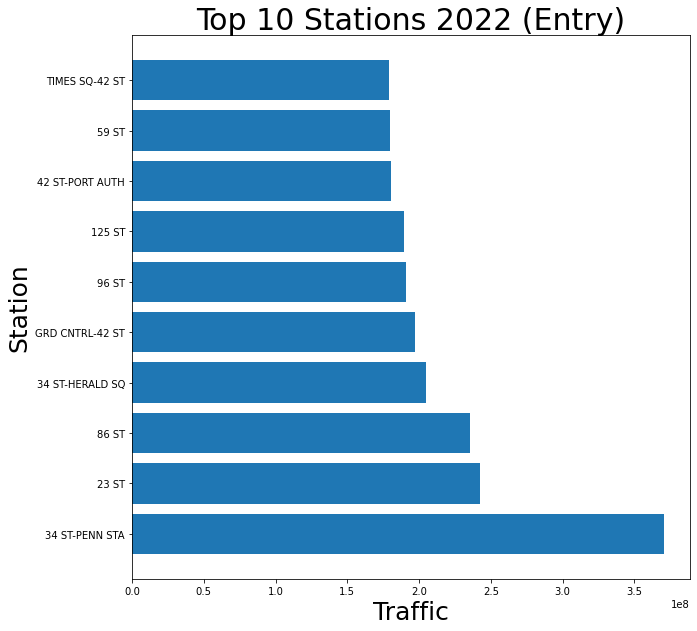

In [218]:
new_x = station_totals_2022['STATION'][:10]
new_y = station_totals_2022['TOT_ENTRIES'][:10]
plt.figure(figsize=(10,10))
plt.ylabel('Station',fontsize = 25)
plt.xlabel('Traffic',fontsize = 25)
plt.title('Top 10 Stations 2022 (Entry)', fontsize = 30)
plt.barh(new_x,new_y);
# plt.savefig('top10_stations_2022.jpg');

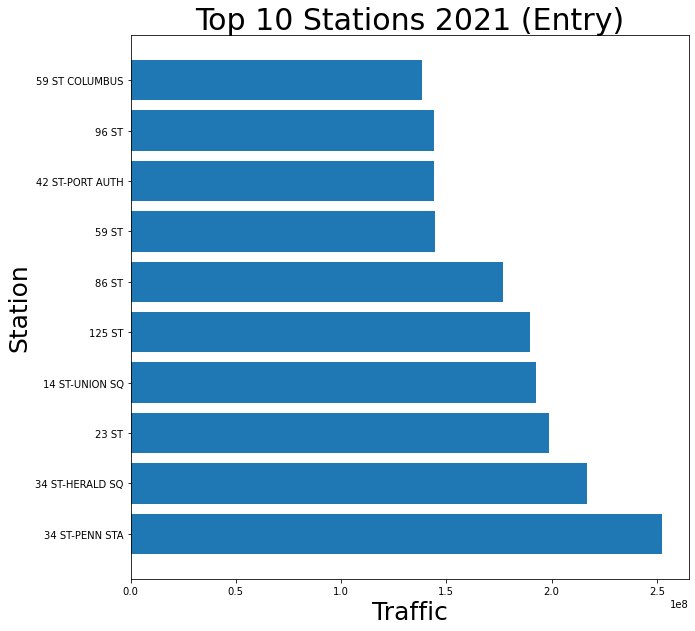

In [219]:
new_x = station_totals_2021['STATION'][:10]
new_y = station_totals_2021['TOT_ENTRIES'][:10]
plt.figure(figsize=(10,10))
plt.ylabel('Station',fontsize = 25)
plt.xlabel('Traffic',fontsize = 25)
plt.title('Top 10 Stations 2021 (Entry)', fontsize = 30)
plt.barh(new_x,new_y);
# plt.savefig('top10_stations_2021.jpg');

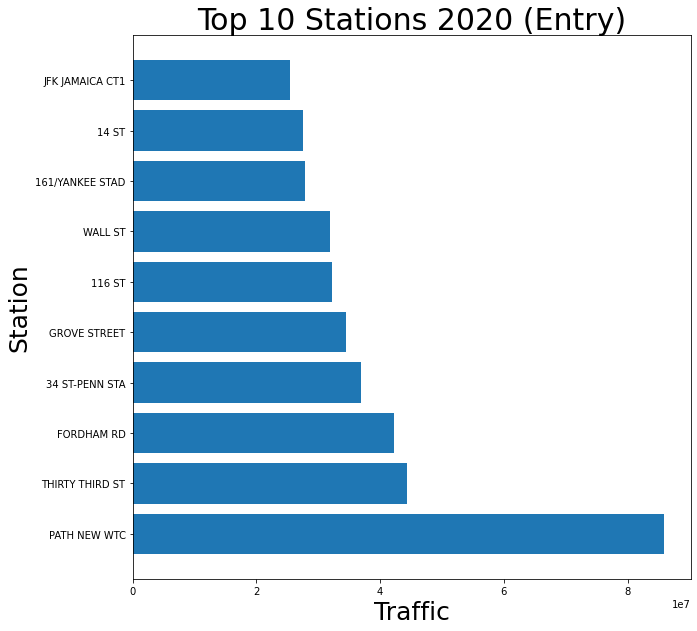

In [220]:
new_x = station_totals_2020['STATION'][:10]
new_y = station_totals_2020['TOT_ENTRIES'][:10]
plt.figure(figsize=(10,10))
plt.ylabel('Station',fontsize = 25)
plt.xlabel('Traffic',fontsize = 25)
plt.title('Top 10 Stations 2020 (Entry)', fontsize = 30)
plt.barh(new_x,new_y);
# plt.savefig('top10_stations_2020.jpg');

In [221]:
#parsing out year and month from date_time field and adding as columns to dataframe
station_totals['YEAR'] = diff_df["DATE_TIME"].dt.year
station_totals['MONTH'] = diff_df["DATE_TIME"].dt.month

In [222]:
station_totals['YEAR']

0         NaN
1      2020.0
2      2020.0
3      2020.0
4      2020.0
        ...  
373    2021.0
374    2022.0
375    2022.0
376    2022.0
377    2022.0
Name: YEAR, Length: 378, dtype: float64

In [223]:
station_totals_yearly = station_totals.groupby(['YEAR'])[['TOT_ENTRIES']].sum().reset_index()

In [224]:
station_totals_yearly

,YEAR,TOT_ENTRIES
0,2020.0,14404769313
1,2021.0,6478883569
2,2022.0,7426823666


In [225]:
operating_businesses_df.head(3)

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location
0,1412954-DCA,Individual,09/30/2012,Inactive,11/04/2011,General Vendor,"LATELLA, SALVATORE F.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,General Vendor Type: General Vendor (White),NaN,NaN,NaN
1,0967332-DCA,Business,02/28/2017,Inactive,02/04/2010,Home Improvement Contractor,"BARBARINO, JOHN JR.",JOHN BARBARINO JR_HOME IMPROVEMENT,239,MEDFORD CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1057563-DCA,Business,02/28/2023,Active,07/27/2000,Home Improvement Contractor,"HITE CONSTRUCTION, INC.",NaN,60,WHITNEY RD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
# converting date columns to datetime
operating_businesses_df['Lic_Exp_DateTime'] = pd.to_datetime(operating_businesses_df['License Expiration Date'])
operating_businesses_df['Lic_Create_DateTime'] = pd.to_datetime(operating_businesses_df['License Creation Date'])

In [227]:
#parsing out year, month, and day from date_time field and adding as columns to dataframe
operating_businesses_df['Lic_Exp_Year']= operating_businesses_df['Lic_Exp_DateTime'].dt.year
operating_businesses_df['Lic_Exp_Month']= operating_businesses_df['Lic_Exp_DateTime'].dt.month
operating_businesses_df['Lic_Exp_Day']= operating_businesses_df['Lic_Exp_DateTime'].dt.day

In [228]:
#parsing out year, month, and day from date_time field and adding as columns to dataframe
operating_businesses_df['Lic_Create_Year']= operating_businesses_df['Lic_Create_DateTime'].dt.year
operating_businesses_df['Lic_Create_Month']= operating_businesses_df['Lic_Create_DateTime'].dt.month
operating_businesses_df['Lic_Create_Day']= operating_businesses_df['Lic_Create_DateTime'].dt.day

In [229]:
Op_Biz_Group = (operating_businesses_df
                .groupby(['License Status', 'License Creation Date', "License Type", 'Industry'])[['Industry']]
               ).count()

In [230]:
#count of industry types aggregrated 
Op_Biz_Group.head(50)

Industry
License Status License Creation Date License Type Industry                                
Active         01/02/1997            Business     Home Improvement Contractor            2
               01/02/1998            Business     Garage                                 1
                                                  Secondhand Dealer - General            1
               01/02/2001            Business     Electronic & Appliance Service         1
                                                  Electronics Store                      1
                                                  Tobacco Retail Dealer                  7
               01/02/2002            Business     Home Improvement Contractor            1
               01/02/2003            Business     Home Improvement Contractor            3
               01/02/2004            Business     Debt Collection Agency                 1
                                     Individual   Tow Truck Driver                       1
               01/02/2007            Business     Electronic & Appliance Service         1
                                                  Home Improvement Contractor            4
                                                  Tobacco Retail Dealer                  1
               01/02/2008            Business     Home Improvement Contractor            1
                                                  Pawnbroker                             1
                                                  Tobacco Retail Dealer                  1
               01/02/2009            Business     Electronics Store                      1
                                                  Home Improvement Contractor            1
               01/02/2013            Business     Debt Collection Agency                 2
               01/02/2014            Business     Debt Collection Agency                 4
                                                  Home Improvement Contractor            3
                                                  Secondhand Dealer - General            2
                                                  Tobacco Retail Dealer                  1
                                     Individual   Locksmith                              1
                                                  Tow Truck Driver                       1
               01/02/2015            Business     Home Improvement Contractor            2
                                                  Secondhand Dealer - General            2
                                                  Stoop Line Stand                       1
                                     Individual   Sightseeing Guide                      1
                                                  Tow Truck Driver                       3
               01/02/2018            Business     Car Wash                               1
                                                  Electronics Store                      1
                                                  Home Improvement Contractor            3
                                                  Secondhand Dealer - Auto               1
                                                  Tobacco Retail Dealer                  9
               01/02/2019            Business     Debt Collection Agency                 1
                                                  Electronic & Appliance Service         1
                                                  Electronics Store                      4
                                                  Stoop Line Stand                       2
                                     Individual   General Vendor                         1
                                                  Tow Truck Driver                       1
               01/02/2020            Business     Dealer In Products                     1
                                                  Debt Collection Agency      

In [231]:
# data mask for active license
mask_active_biz = (operating_businesses_df['License Status'] == 'Active')

In [232]:
# dataframe filtered for active business licenses only
active_operating_biz =  operating_businesses_df[mask_active_biz]

In [233]:
License_Status_Years = (operating_businesses_df
                        .groupby(['License Status', 'Lic_Create_Year'])[['License Status']]
                       ).count()

In [234]:
# active vs inactive count by year
License_Status_Years

License Status
License Status Lic_Create_Year                
Active         1989                          2
               1993                          1
               1994                        187
               1995                        181
               1996                        340
...                                        ...
Inactive       2018                       8875
               2019                       5949
               2020                       1473
               2021                        403
               2022                          7

[63 rows x 1 columns]

In [235]:
# data frame sliced 
License_Status_Years[28:31]

License Status
License Status Lic_Create_Year                
Active         2020                       2407
               2021                       4524
               2022                       1045

# Data Visualization

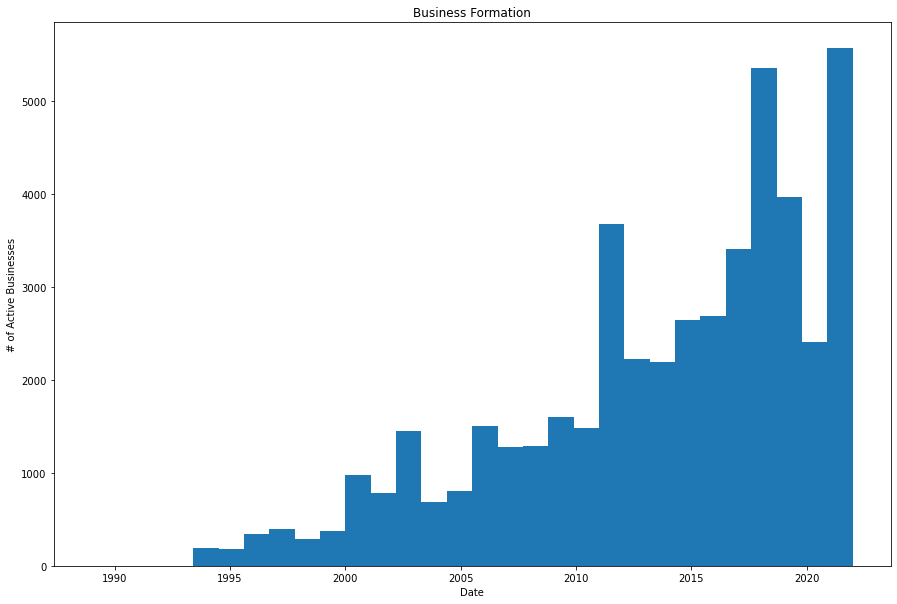

In [236]:
# histogram of active business by year
plt.figure(figsize=(15,10))
plt.hist(active_operating_biz['Lic_Create_Year'], bins=30)
plt.ylabel('# of Active Businesses')
plt.xlabel('Date')
plt.title('Business Formation');

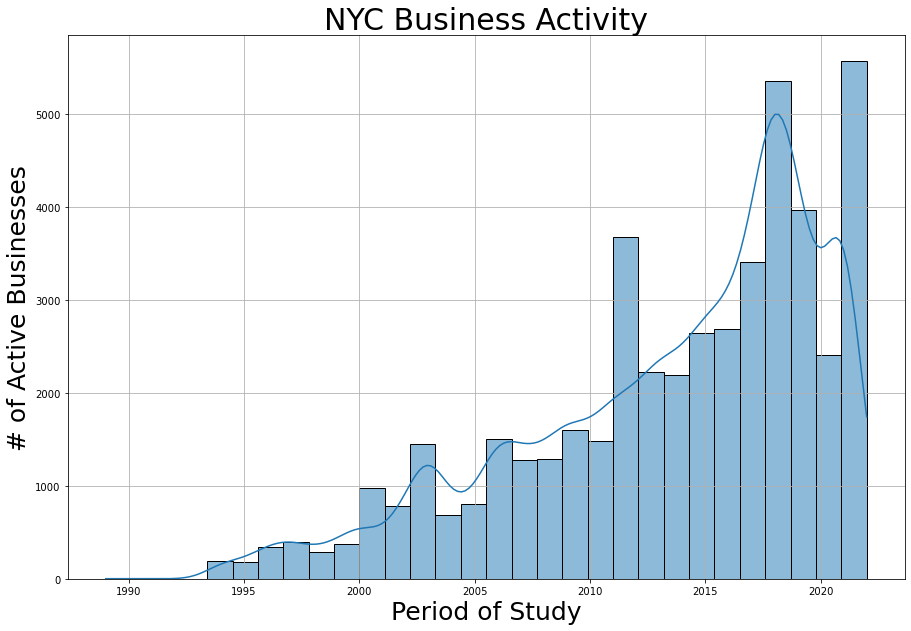

In [237]:
plt.figure(figsize=(15,10))
sns.histplot(active_operating_biz['Lic_Create_Year'],bins=30, kde=True)
plt.ylabel('# of Active Businesses', fontsize = 25)
plt.xlabel('Period of Study', fontsize = 25)
plt.grid()
plt.title('NYC Business Activity', fontsize = 30)
plt.savefig('nyc_biz_activity.jpg');

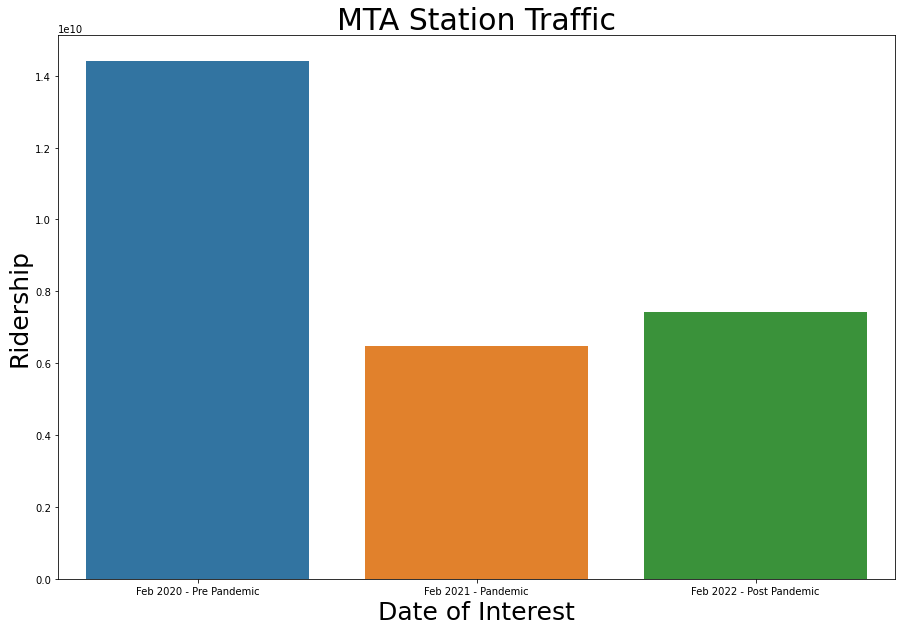

In [238]:
plt.figure(figsize=(15,10))
sns.barplot(y = 'TOT_ENTRIES', x = 'YEAR', data = station_totals_yearly)
plt.xlabel('Date of Interest', fontsize = 25)
plt.ylabel('Ridership', fontsize = 25)
plt.xticks([0,1,2], ['Feb 2020 - Pre Pandemic','Feb 2021 - Pandemic','Feb 2022 - Post Pandemic'])
plt.title('MTA Station Traffic', fontsize = 30)
plt.savefig('bar_chart_station_traffic.jpg');

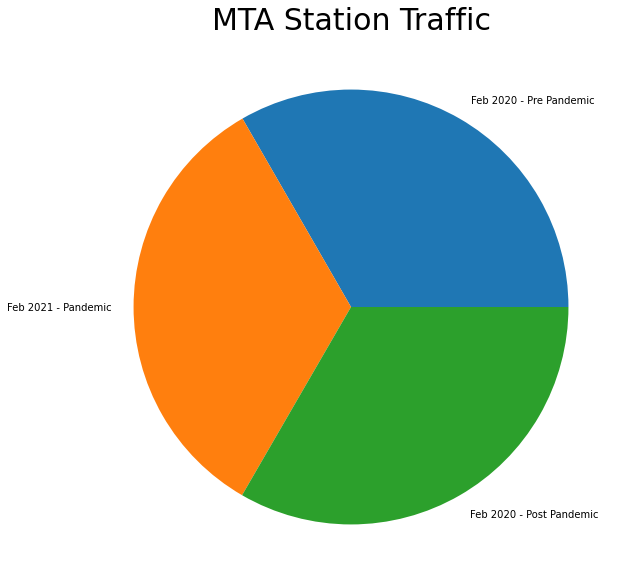

In [239]:
label_names = ['Feb 2020 - Pre Pandemic', 'Feb 2021 - Pandemic', 'Feb 2020 - Post Pandemic']
plt.figure(figsize=(15,10))
plt.pie(station_totals_yearly['YEAR'], labels = label_names,)
plt.title('MTA Station Traffic', fontsize = 30)
plt.savefig('pie_chart_station_traffic.jpg');

In [240]:
operating_businesses_df['License Type'].value_counts()

Business      181215
Individual     91910
Name: License Type, dtype: int64

In [241]:
operating_businesses_df['License Status'].value_counts()

Inactive    225347
Active       47778
Name: License Status, dtype: int64

In [242]:
operating_businesses_df['Industry'].value_counts()

Home Improvement Salesperson      41020
Home Improvement Contractor       40084
Tobacco Retail Dealer             39393
Secondhand Dealer - General       16732
Electronics Store                 14890
General Vendor                     9960
Tow Truck Driver                   9801
Stoop Line Stand                   9536
Sightseeing Guide                  7334
Electronic & Appliance Service     7027
Laundry                            6883
Pedicab Driver                     6288
Process Server Individual          6076
Locksmith                          5131
Debt Collection Agency             5122
Laundries                          4950
Laundry Jobber                     4368
Sidewalk Cafe                      3830
Ticket Seller                      3535
Garage                             3456
Electronic Cigarette Dealer        3431
Secondhand Dealer - Auto           2875
Dealer In Products                 2775
Parking Lot                        1829
Amusement Device Portable          1779


In [243]:
covid_df.dtypes

DATE_OF_INTEREST                  datetime64[ns]
CASE_COUNT                                 int64
probable_case_count                        int64
HOSPITALIZED_COUNT                         int64
DEATH_COUNT                                int64
                                       ...      
si_all_case_count_7day_avg                 int64
SI_HOSPITALIZED_COUNT_7DAY_AVG             int64
SI_DEATH_COUNT_7DAY_AVG                    int64
si_all_death_count_7day_avg                int64
INCOMPLETE                                 int64
Length: 62, dtype: object

In [244]:
covid_df[['DATE_OF_INTEREST','CASE_COUNT']]

,DATE_OF_INTEREST,CASE_COUNT
0,2020-02-29,1
1,2020-03-01,0
2,2020-03-02,0
3,2020-03-03,1
4,2020-03-04,5
...,...,...
734,2022-03-04,447
735,2022-03-05,293
736,2022-03-06,319
737,2022-03-07,604


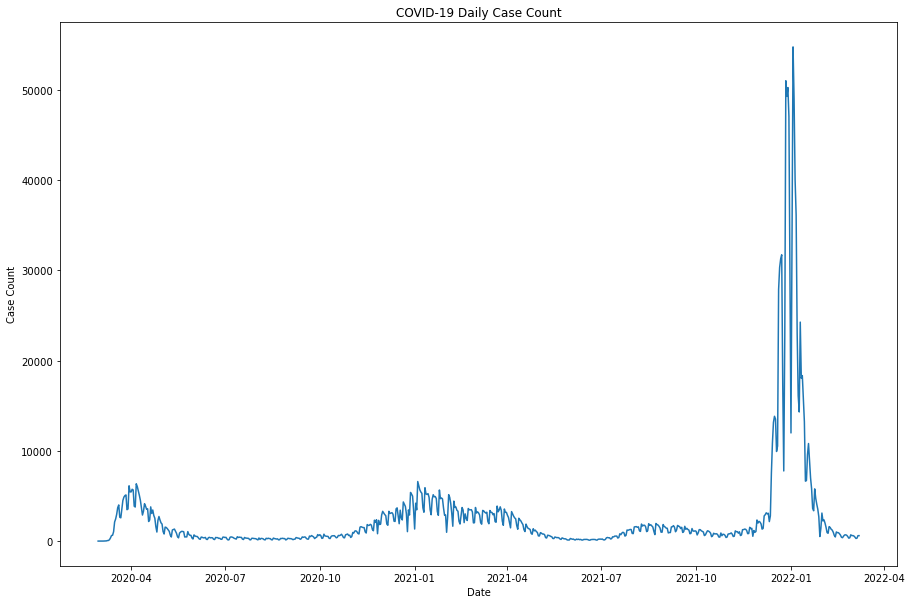

In [245]:
plt.figure(figsize=(15,10))
plt.plot(covid_df['DATE_OF_INTEREST'], covid_df['CASE_COUNT'])
plt.ylabel('Case Count')
plt.xlabel('Date')
plt.title('COVID-19 Daily Case Count');

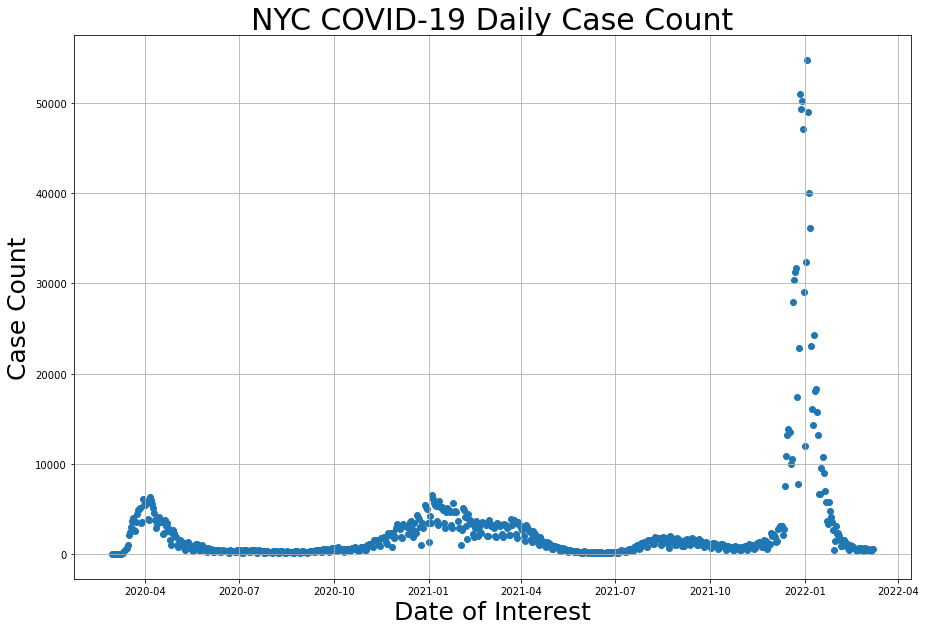

In [246]:
plt.figure(figsize=(15,10))
plt.scatter(covid_df['DATE_OF_INTEREST'], covid_df['CASE_COUNT'])
plt.ylabel('Case Count',fontsize = 25)
plt.xlabel('Date of Interest',fontsize = 25)
plt.grid()
plt.title('NYC COVID-19 Daily Case Count', fontsize = 30)
plt.savefig('covid_case_count.jpg');